<Figure size 1000x400 with 0 Axes>

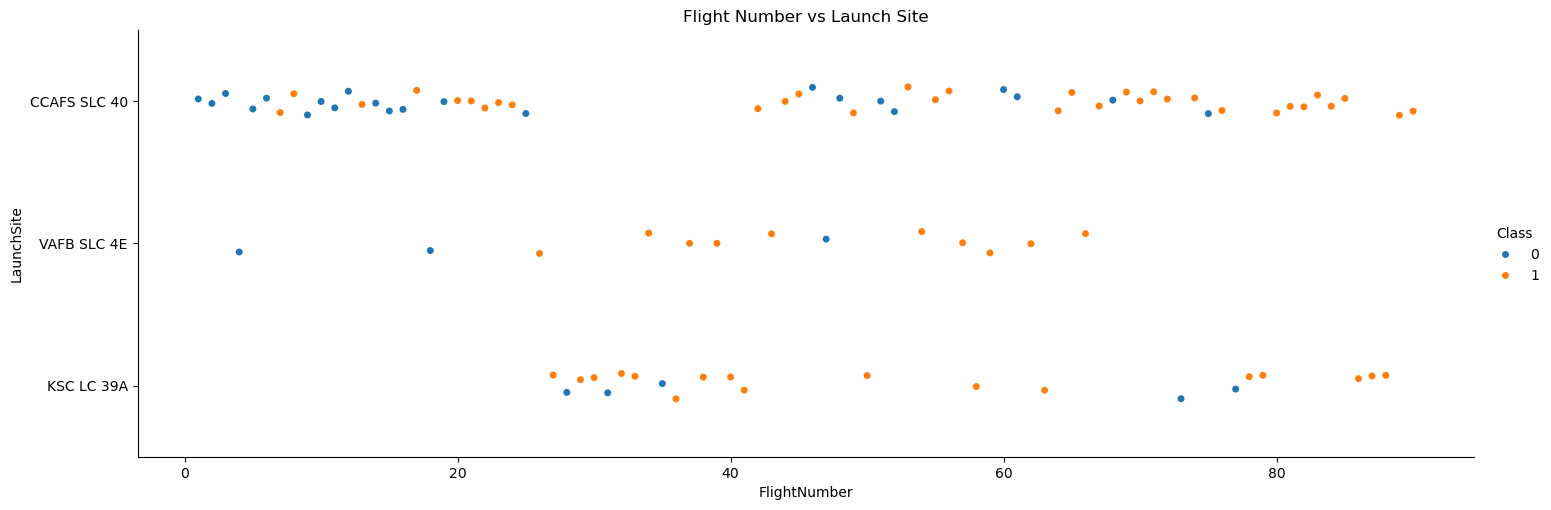

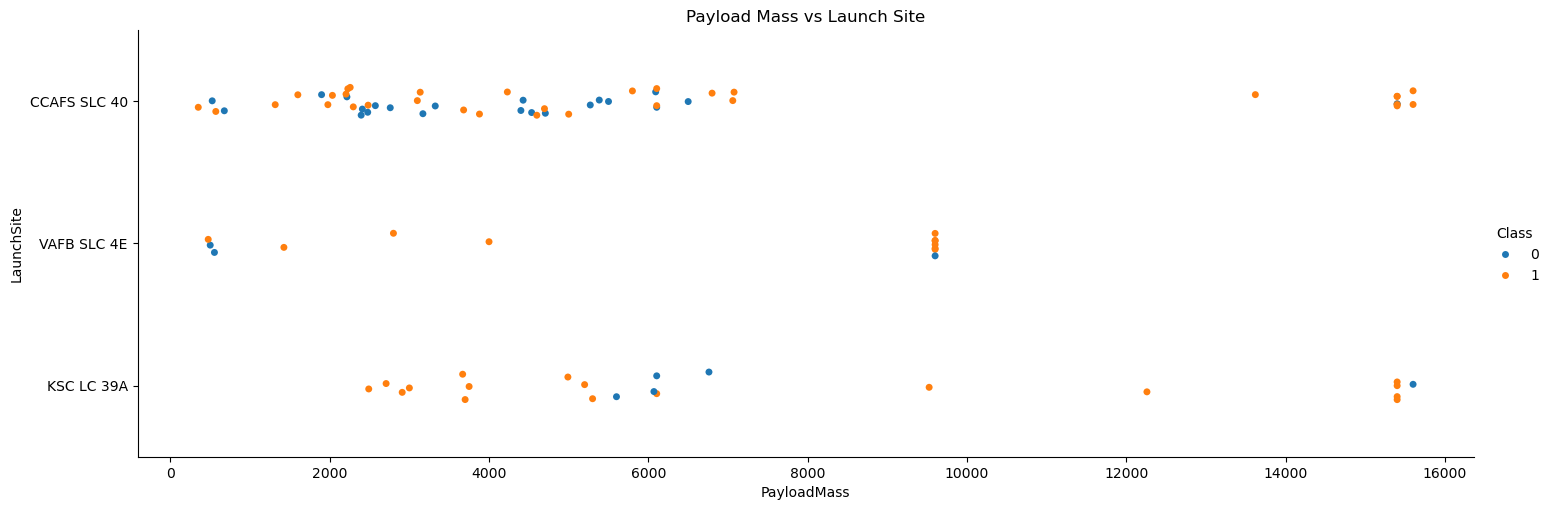

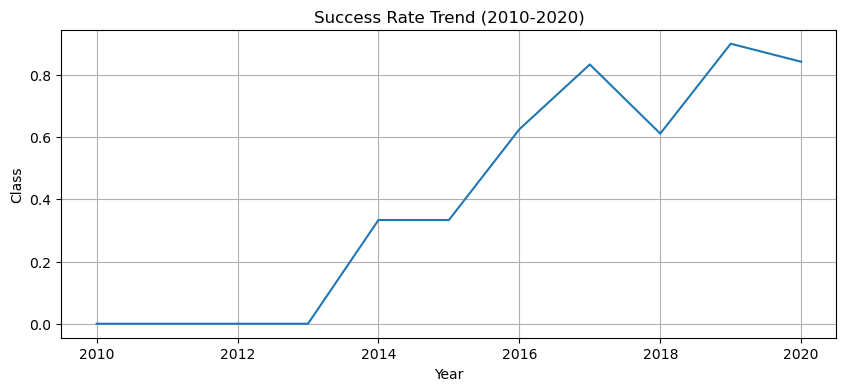


--- SQL QUERY RESULTS ---
1. Launch Sites:      LaunchSite
0  CCAFS SLC 40
1   VAFB SLC 4E
2    KSC LC 39A

2. Outcome Counts:    Class  Qty
0      0   30
1      1   60

3. Landing Outcomes Ranking (2010-2017):
       Outcome  Count
0    None None      9
1    True ASDS      5
2   False ASDS      4
3    True RTLS      3
4   True Ocean      3
5    None ASDS      2
6  False Ocean      2


In [4]:
# !pip install sqlalchemy ipython-sql seaborn matplotlib

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

# Load data
df = pd.read_csv("dataset_part_2.csv")

# --- PART A: VISUALIZATION ---
# 1. Scatter: Flight Number vs Launch Site
plt.figure(figsize=(10, 4))
sns.catplot(x="FlightNumber", y="LaunchSite", hue="Class", data=df, aspect=3)
plt.title("Flight Number vs Launch Site")
plt.show()

# 2. Scatter: Payload vs Launch Site
sns.catplot(x="PayloadMass", y="LaunchSite", hue="Class", data=df, aspect=3)
plt.title("Payload Mass vs Launch Site")
plt.show()

# 3. Line Chart: Success Rate by Year
df['Year'] = pd.DatetimeIndex(df['Date']).year
avg_success = df.groupby('Year')['Class'].mean().reset_index()
plt.figure(figsize=(10, 4))
sns.lineplot(data=avg_success, x='Year', y='Class')
plt.title("Success Rate Trend (2010-2020)")
plt.grid(True)
plt.show()

# --- PART B: SQL ANALYSIS ---
# Setup in-memory DB
con = sqlite3.connect(":memory:")
df.to_sql("SPACEXTBL", con, index=False, if_exists='replace')

print("\n--- SQL QUERY RESULTS ---")
# Query 1: Unique Sites
print("1. Launch Sites:", pd.read_sql("SELECT DISTINCT LaunchSite FROM SPACEXTBL", con))

# Query 2: Success/Fail Count
print("\n2. Outcome Counts:", pd.read_sql("SELECT Class, COUNT(*) as Qty FROM SPACEXTBL GROUP BY Class", con))

# Query 3: Rank landing outcomes (2010-2017) - CRITICAL GRADING TASK
query_rank = """
SELECT Outcome, COUNT(*) as Count 
FROM SPACEXTBL 
WHERE Date BETWEEN '2010-06-04' AND '2017-03-20' 
GROUP BY Outcome 
ORDER BY Count DESC
"""
print("\n3. Landing Outcomes Ranking (2010-2017):")
print(pd.read_sql(query_rank, con))